In [1]:
import numpy as np

# parâmetros
S0 = 100 # preço atual do ativo subjacente
K = 110 # preço de exercício
r = 0.05 # taxa de juros livre de risco
sigma = 0.2 # volatilidade
T = 1 # tempo até a data de vencimento (em anos)
n = 10000 # número de simulações

# simulação de Monte Carlo
Z = np.random.normal(size=n)
ST = S0 * np.exp((r - sigma**2/2) * T + sigma * np.sqrt(T) * Z)

# cálculo do valor da opção
payoff = np.maximum(ST - K, 0)
valor_opcao = np.exp(-r * T) * np.mean(payoff)

print(f"O valor da opção de compra é {valor_opcao:.2f}")


O valor da opção de compra é 6.07


Probabilidade: 0.4138


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


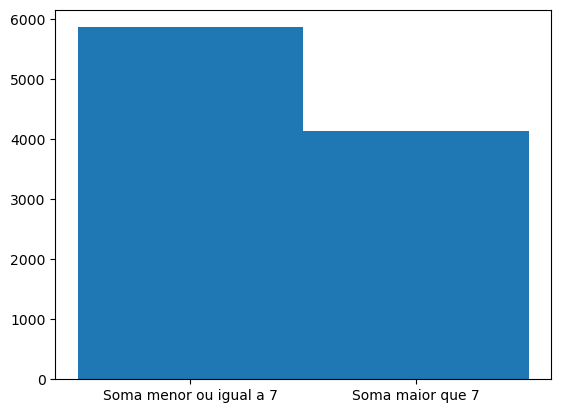

In [2]:
import random
import matplotlib.pyplot as plt

n_simulacoes = 10000  # número de simulações
resultados = []  # lista para armazenar os resultados

for i in range(n_simulacoes):
    dado1 = random.randint(1, 6)
    dado2 = random.randint(1, 6)
    soma = dado1 + dado2
    resultados.append(soma > 7)

probabilidade = sum(resultados) / n_simulacoes
print('Probabilidade:', probabilidade)

# plot do histograma dos resultados
plt.hist(resultados, bins=[0, 0.5, 1], align='mid')
plt.xticks([0.25, 0.75], ['Soma menor ou igual a 7', 'Soma maior que 7'])
plt.show()


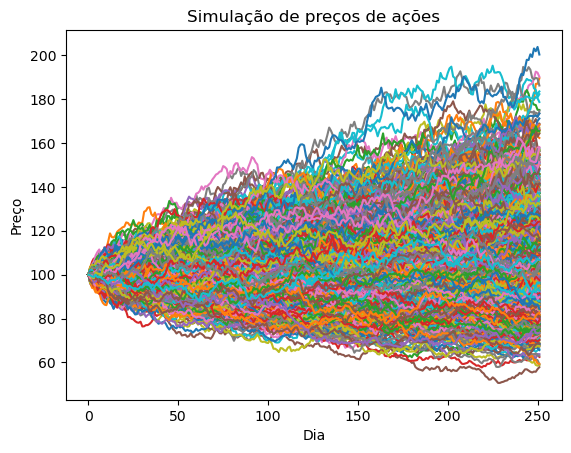

In [3]:
import numpy as np
import matplotlib.pyplot as plt

preco_inicial = 100  # preço inicial da ação
n_dias = 252  # número de dias no ano
taxa_juros = 0.05  # taxa de juros livre de risco
volatilidade = 0.2  # volatilidade do mercado
n_simulacoes = 1000  # número de simulações

# geração de séries de preços simulados
retorno_diario = np.random.normal((taxa_juros / n_dias), (volatilidade / np.sqrt(n_dias)), (n_dias, n_simulacoes))
preco = np.zeros_like(retorno_diario)
preco[0] = preco_inicial

for t in range(1, n_dias):
    preco[t] = preco[t - 1] * np.exp(retorno_diario[t])

# plot da série temporal dos preços simulados
plt.plot(preco)
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.title('Simulação de preços de ações')
plt.show()


Preço da opção de compra: 10.30214093532184
Preço da opção de venda: 7.338427950047409


Text(0.5, 1.0, 'Simulação')

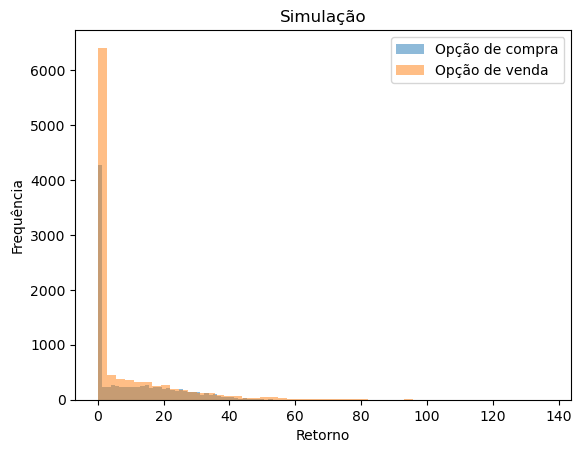

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros da simulação
preco_inicial = 100  # preço inicial da ação
preco_exercicio = 110  # preço de exercício da opção
volatilidade = 0.2  # volatilidade do mercado
taxa_juros = 0.05  # taxa de juros livre de risco
n_dias = 252  # número de dias no ano
n_simulacoes = 10000  # número de simulações

# simulação do preço da ação
retorno_diario = np.random.normal((taxa_juros / n_dias), (volatilidade / np.sqrt(n_dias)), (n_dias, n_simulacoes))
preco = np.zeros_like(retorno_diario)
preco[0] = preco_inicial

for t in range(1, n_dias):
    preco[t] = preco[t - 1] * np.exp(retorno_diario[t])

# simulação do preço da opção de compra
retorno_opcao_compra = np.zeros_like(preco)
for t in range(0, n_dias):
    retorno_opcao_compra[t] = np.maximum(preco_exercicio - preco[t], 0) * np.exp(-taxa_juros * (n_dias - t) / n_dias)

preco_opcao_compra = np.mean(retorno_opcao_compra[-1])
print('Preço da opção de compra:', preco_opcao_compra)

# simulação do preço da opção de venda
retorno_opcao_venda = np.zeros_like(preco)
for t in range(0, n_dias):
    retorno_opcao_venda[t] = np.maximum(preco[t] - preco_exercicio, 0) * np.exp(-taxa_juros * (n_dias - t) / n_dias)

preco_opcao_venda = np.mean(retorno_opcao_venda[-1])
print('Preço da opção de venda:', preco_opcao_venda)

# plot dos resultados
plt.hist(retorno_opcao_compra[-1], bins=50, alpha=0.5, label='Opção de compra')
plt.hist(retorno_opcao_venda[-1], bins=50, alpha=0.5, label='Opção de venda')
plt.legend(loc='upper right')
plt.xlabel('Retorno')
plt.ylabel('Frequência')
plt.title("Simulação")


In [7]:
import numpy as np

# parâmetros da simulação
S0 = 100 # preço inicial da ação
K = 110 # preço de exercício da opção
T = 1 # tempo até a data de vencimento, em anos
r = 0.05 # taxa de juros livre de risco
sigma = 0.2 # volatilidade do mercado
n_simulacoes = 10000 # número de simulações

# simulação do preço da ação
n_steps = int(252*T)
dt = T / n_steps
retornos = np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.randn(n_steps, n_simulacoes))
preco = S0 * np.cumprod(retornos, axis=0)

# simulação do preço da opção de compra
opcao_compra = np.exp(-r*T) * np.maximum(preco[-1] - K, 0)
preco_opcao_compra = np.mean(opcao_compra)
print('Preço da opção de compra:', preco_opcao_compra)


Preço da opção de compra: 6.1811362985889025


In [8]:
import numpy as np

# parâmetros da simulação
S0 = 100 # preço inicial da ação
K = 110 # preço de exercício da opção
T = 1 # tempo até a data de vencimento, em anos
r = 0.05 # taxa de juros livre de risco
sigma = 0.2 # volatilidade do mercado
n_simulacoes = 10000 # número de simulações

# simulação do preço da ação
n_steps = int(252*T)
dt = T / n_steps
retornos = np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.randn(n_steps, n_simulacoes))
preco = S0 * np.cumprod(retornos, axis=0)

# simulação do preço da opção de venda
opcao_venda = np.exp(-r*T) * np.maximum(K - preco[-1], 0)
preco_opcao_venda = np.mean(opcao_venda)
print('Preço da opção de venda:', preco_opcao_venda)


Preço da opção de venda: 10.784679881554185


Preço da opção de compra: 6.1609168927669185


ValueError: x and y must have same first dimension, but have shapes (253,) and (252, 1000)

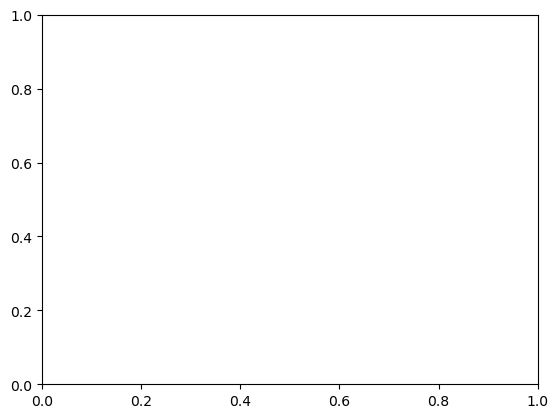

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros da simulação
S0 = 100 # preço inicial da ação
K = 110 # preço de exercício da opção
T = 1 # tempo até a data de vencimento, em anos
r = 0.05 # taxa de juros livre de risco
sigma = 0.2 # volatilidade do mercado
n_simulacoes = 1000 # número de simulações

# simulação do preço da ação
n_steps = int(252*T)
dt = T / n_steps
retornos = np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.randn(n_steps, n_simulacoes))
preco = S0 * np.cumprod(retornos, axis=0)

# simulação do preço da opção de compra
opcao_compra = np.exp(-r*T) * np.maximum(preco[-1] - K, 0)
preco_opcao_compra = np.mean(opcao_compra)
print('Preço da opção de compra:', preco_opcao_compra)

# plot do preço da ação
fig, ax1 = plt.subplots()
ax1.plot(np.arange(0, T+dt, dt), preco)
ax1.set_xlabel('Tempo (anos)')
ax1.set_ylabel('Preço da ação')

# plot do preço da opção de compra
ax2 = ax1.twinx()
ax2.plot([T], [preco_opcao_compra], 'ro', label='Preço da opção')
ax2.set_ylabel('Preço da opção de compra')
ax2.legend(loc='upper left')

plt.show()


Preço da opção de compra: 5.126508912515043


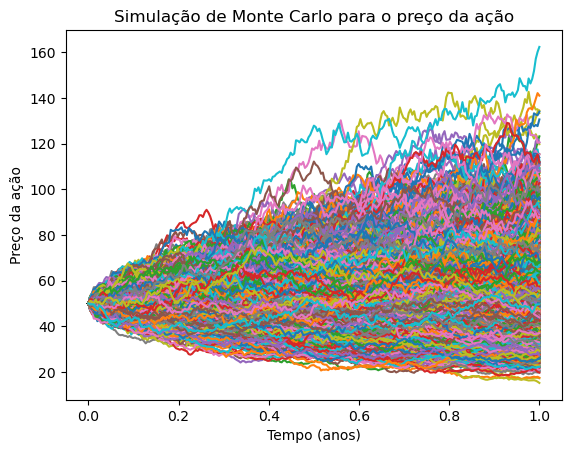

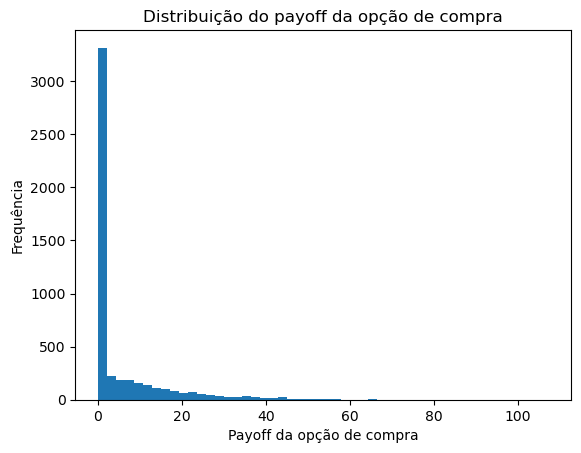

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da simulação
S0 = 50    # preço atual da ação
K = 55     # preço de exercício da opção
r = 0.05   # taxa de juros livre de risco
sigma = 0.3   # volatilidade da ação
T = 1      # tempo de expiração da opção (em anos)
dt = 1/252  # intervalo de tempo para cada simulação (em anos)
N = int(T / dt) + 1   # número de pontos no eixo x (tempo)
n_simulacoes = 5000   # número de simulações

# Simulação de Monte Carlo
preco = np.zeros((N, n_simulacoes))
preco[0,:] = S0
for i in range(1, N):
    Z = np.random.standard_normal(n_simulacoes)
    preco[i,:] = preco[i-1,:] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Cálculo do preço da opção de compra
ST = preco[-1,:]   # preço final da ação
payoff = np.maximum(ST - K, 0)   # payoff da opção de compra
preco_opcao = np.exp(-r * T) * np.mean(payoff)   # preço da opção de compra

print(f'Preço da opção de compra: {preco_opcao}')

# Plot do preço da ação
fig, ax1 = plt.subplots()
t = np.linspace(0, T, num=N)
ax1.plot(t, preco)
ax1.set_xlabel('Tempo (anos)')
ax1.set_ylabel('Preço da ação')
ax1.set_title('Simulação de Monte Carlo para o preço da ação')

# Plot do payoff da opção de compra
fig, ax2 = plt.subplots()
ax2.hist(payoff, bins=50)
ax2.set_xlabel('Payoff da opção de compra')
ax2.set_ylabel('Frequência')
ax2.set_title('Distribuição do payoff da opção de compra')

plt.show()


Preço da ação no vencimento: 105.19645199731147
Preço da opção de venda: 5.664086415248154


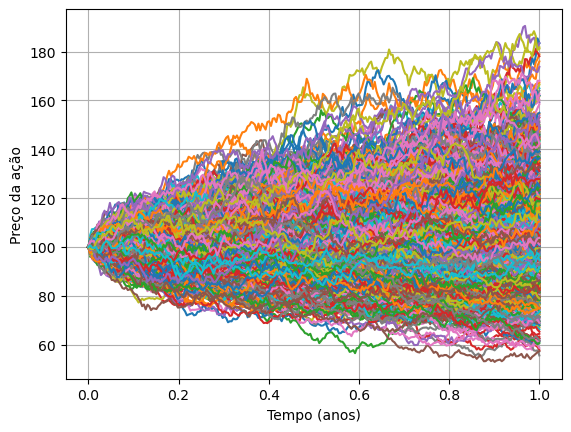

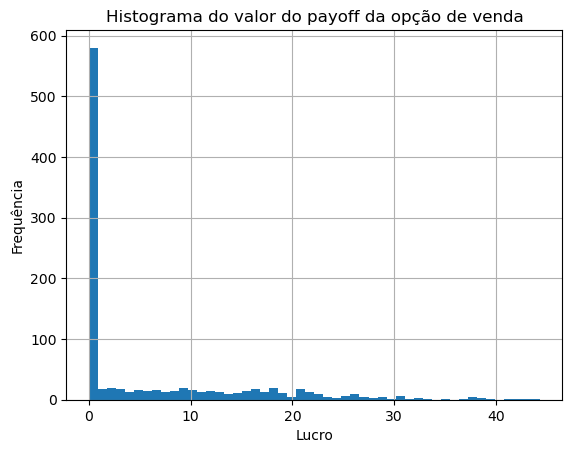

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
S0 = 100  # Preço inicial da ação
K = 100  # Preço de exercício da opção
r = 0.05  # Taxa de juros livre de risco
sigma = 0.2  # Volatilidade da ação
T = 1  # Tempo até o vencimento da opção
N = 252  # Número de períodos de tempo
dt = T/N  # Tamanho do intervalo de tempo

# Simulação dos caminhos aleatórios
np.random.seed(42)
epsilon = np.random.normal(size=(N, 1000))
preco = np.zeros((N+1, 1000))
preco[0] = S0
for i in range(N):
    preco[i+1] = preco[i] * np.exp((r - sigma**2/2)*dt + sigma*np.sqrt(dt)*epsilon[i])

# Valor da opção de venda
payoff_put = np.maximum(K - preco[-1], 0)
valor_put = np.exp(-r*T)*np.mean(payoff_put)

# plot do preço da ação
fig, ax1 = plt.subplots()
ax1.plot(np.arange(0, T+dt, dt), preco)
ax1.set_xlabel('Tempo (anos)')
ax1.set_ylabel('Preço da ação')
ax1.grid()

# plot do valor da opção de venda
fig, ax2 = plt.subplots()
ax2.hist(payoff_put, bins=50)
ax2.set_xlabel('Lucro')
ax2.set_ylabel('Frequência')
ax2.set_title('Histograma do valor do payoff da opção de venda')
ax2.grid()

# resultado
print(f'Preço da ação no vencimento: {preco[-1].mean()}')
print(f'Preço da opção de venda: {valor_put}')
